In [5]:
import pandas as pd

In [6]:
import pandas as pd
import os

# Define file paths
inner_folder_path = r"C:\Users\mmjay\OneDrive\Desktop\WingerHospitalManagement"  # Replace with actual path
file_paths = {
    "precautions": os.path.join(inner_folder_path, "precautions_df.csv"),
    "symptoms": os.path.join(inner_folder_path, "symtoms_df.csv"),
    "training": os.path.join(inner_folder_path, "Training.csv"),
    "workout": os.path.join(inner_folder_path, "workout_df.csv"),
}

# Load datasets
precautions = pd.read_csv(file_paths["precautions"])
symptoms = pd.read_csv(file_paths["symptoms"])
training = pd.read_csv(file_paths["training"])
workout = pd.read_csv(file_paths["workout"])

# 1. Remove unnecessary columns
precautions.drop(columns=["Unnamed: 0"], inplace=True)
symptoms.drop(columns=["Unnamed: 0"], inplace=True)
workout.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

# 2. Handle missing values (Fill with empty strings or mode)
precautions.fillna("", inplace=True)
symptoms.fillna("", inplace=True)

# 3. Remove duplicate rows
training.drop_duplicates(inplace=True)

# 4. Ensure consistent formatting (Convert column names to lowercase)
training.columns = training.columns.str.lower()
precautions.columns = precautions.columns.str.lower()
symptoms.columns = symptoms.columns.str.lower()
workout.columns = workout.columns.str.lower()

# Save cleaned datasets
precautions.to_csv(os.path.join(inner_folder_path, "cleaned_precautions.csv"), index=False)
symptoms.to_csv(os.path.join(inner_folder_path, "cleaned_symptoms.csv"), index=False)
training.to_csv(os.path.join(inner_folder_path, "cleaned_training.csv"), index=False)
workout.to_csv(os.path.join(inner_folder_path, "cleaned_workout.csv"), index=False)

print("Data cleaning completed and files saved.")

Data cleaning completed and files saved.


Missing values in precautions:
 Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64
Missing values in symptom_severity:
 Symptom    0
weight     0
dtype: int64
Missing values in symptoms:
 Disease        0
Symptom_1      0
Symptom_2      0
Symptom_3      0
Symptom_4    348
dtype: int64
Missing values in training:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
Missing values in workout:
 disease    0
workout    0
dtype: int64
Missing values in description:
 Disease        0
Description    0
dtype: int64
Missing values in diets:
 Disease    0
Diet       0
dtype: int64
Missing values in medications:
 Disease       0
Medication    0
dtype: int64
✅ Data Preprocessing Complete. Re

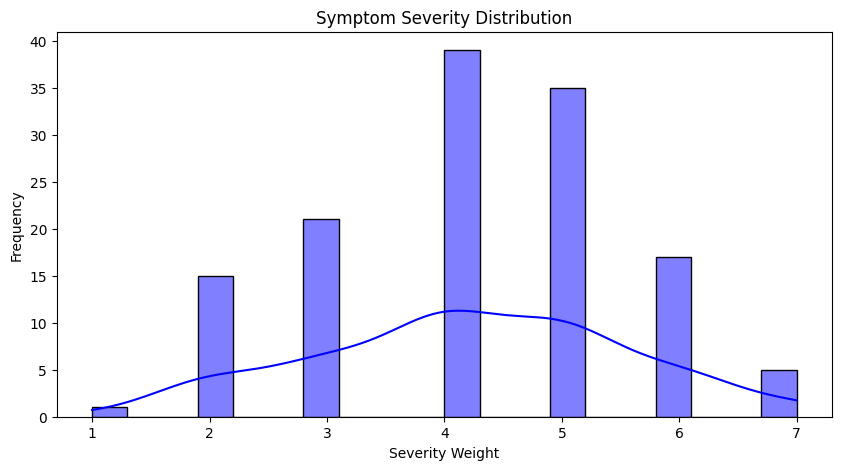

C:\Users\mmjay\AppData\Local\Temp\ipykernel_21584\835430053.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette='viridis')


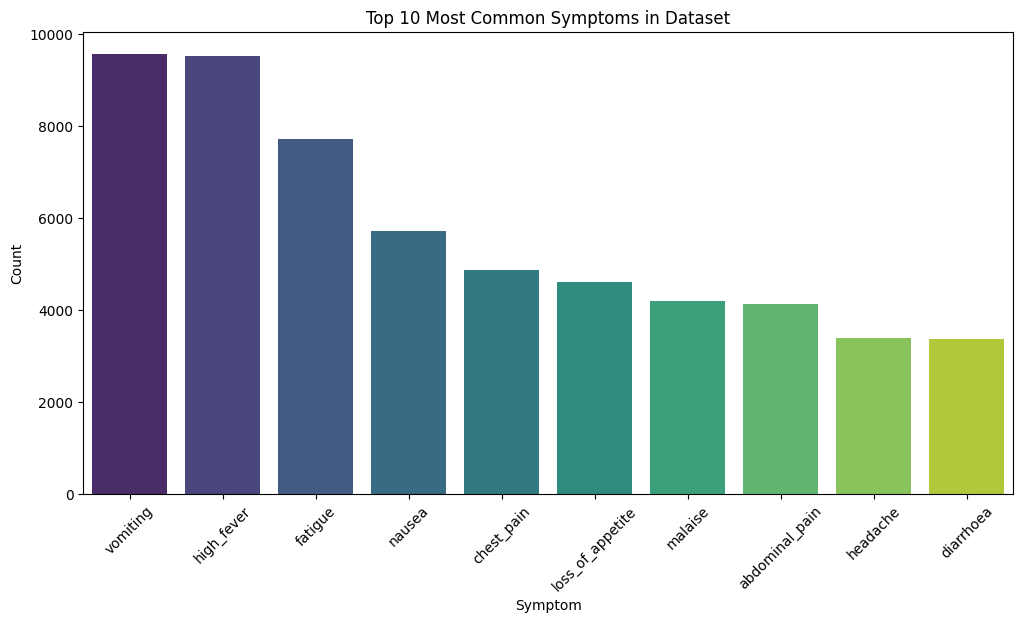

C:\Users\mmjay\AppData\Local\Temp\ipykernel_21584\835430053.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datasets['training']['prognosis'], palette='coolwarm')


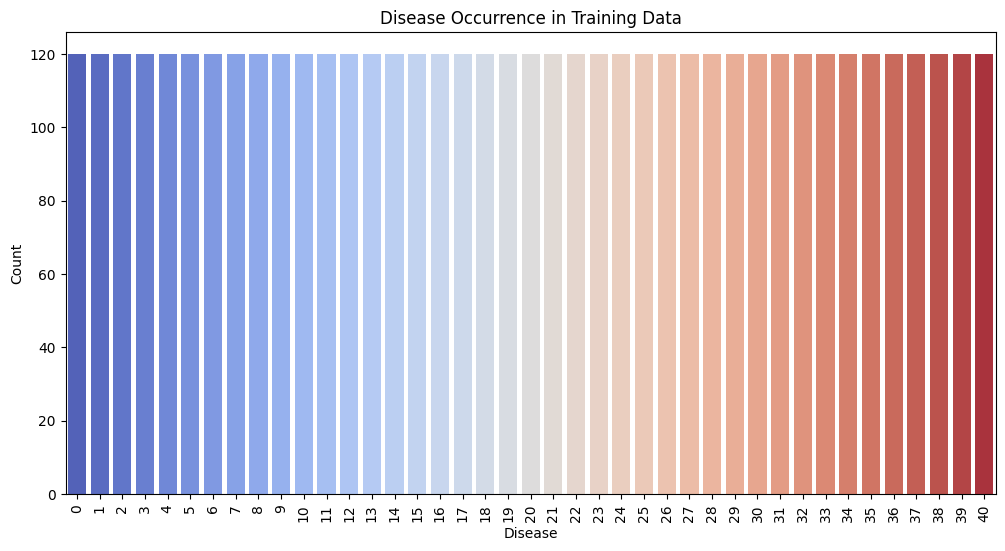

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load datasets
files = {
    "precautions": "precautions_df.csv",
    "symptom_severity": "Symptom-severity.csv",
    "symptoms": "symtoms_df.csv",
    "training": "Training.csv",
    "workout": "workout_df.csv",
    "description": "description.csv",
    "diets": "diets.csv",
    "medications": "medications.csv"
}

datasets = {name: pd.read_csv(path) for name, path in files.items()}

# Drop unnecessary columns (Unnamed columns)
for name, df in datasets.items():
    df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True, errors='ignore')

# Check for missing values and fill them appropriately
for name, df in datasets.items():
    print(f"Missing values in {name}:\n", df.isnull().sum())
    datasets[name] = df.fillna("Not Available")

# Convert categorical disease names to numerical labels
le = LabelEncoder()
datasets['training']['prognosis'] = le.fit_transform(datasets['training']['prognosis'])

# Function to map symptom severity
def map_severity(symptom):
    row = datasets['symptom_severity'][datasets['symptom_severity']['Symptom'] == symptom]
    return row['weight'].values[0] if not row.empty else 0

# Convert symptoms into weighted values in training dataset
for col in datasets['training'].columns[:-1]:  # Exclude target column
    if col in datasets['symptom_severity']['Symptom'].values:
        datasets['training'][col] *= map_severity(col)

# Save preprocessed datasets
datasets['training'].to_csv("training_cleaned.csv", index=False)
for name, df in datasets.items():
    df.to_csv(f"C:/Users/mmjay/OneDrive/Desktop/WingerHospitalManagement{name}_cleaned.csv", index=False)

print("✅ Data Preprocessing Complete. Ready for Model Training.")

# Visualization: Symptom Severity Distribution
plt.figure(figsize=(10, 5))
sns.histplot(datasets['symptom_severity']['weight'], bins=20, kde=True, color='blue')
plt.title("Symptom Severity Distribution")
plt.xlabel("Severity Weight")
plt.ylabel("Frequency")
plt.show()

# Visualization: Top 10 Most Common Symptoms
symptom_counts = datasets['training'].drop(columns=['prognosis']).sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Symptoms in Dataset")
plt.xlabel("Symptom")
plt.ylabel("Count")
plt.show()

# Visualization: Disease Occurrence
plt.figure(figsize=(12, 6))
sns.countplot(x=datasets['training']['prognosis'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Disease Occurrence in Training Data")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

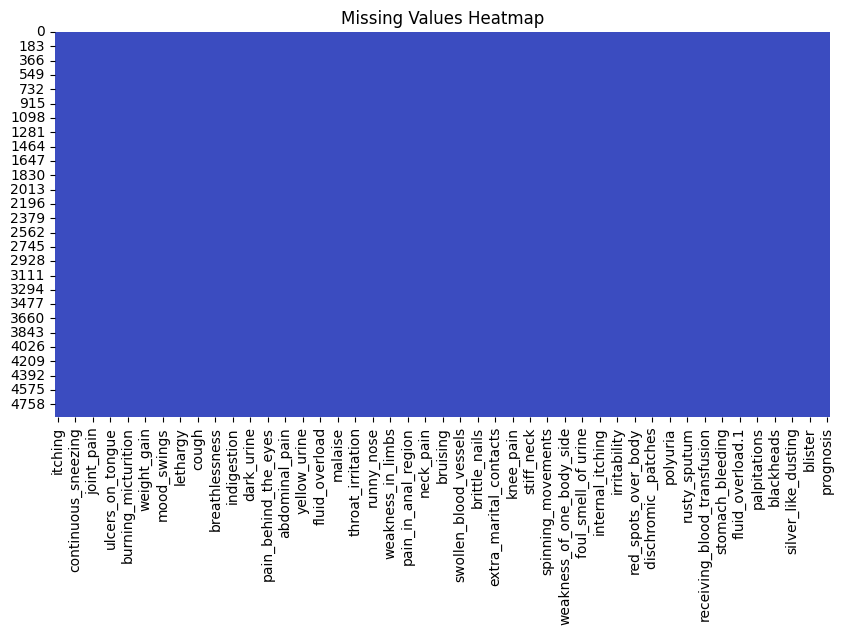

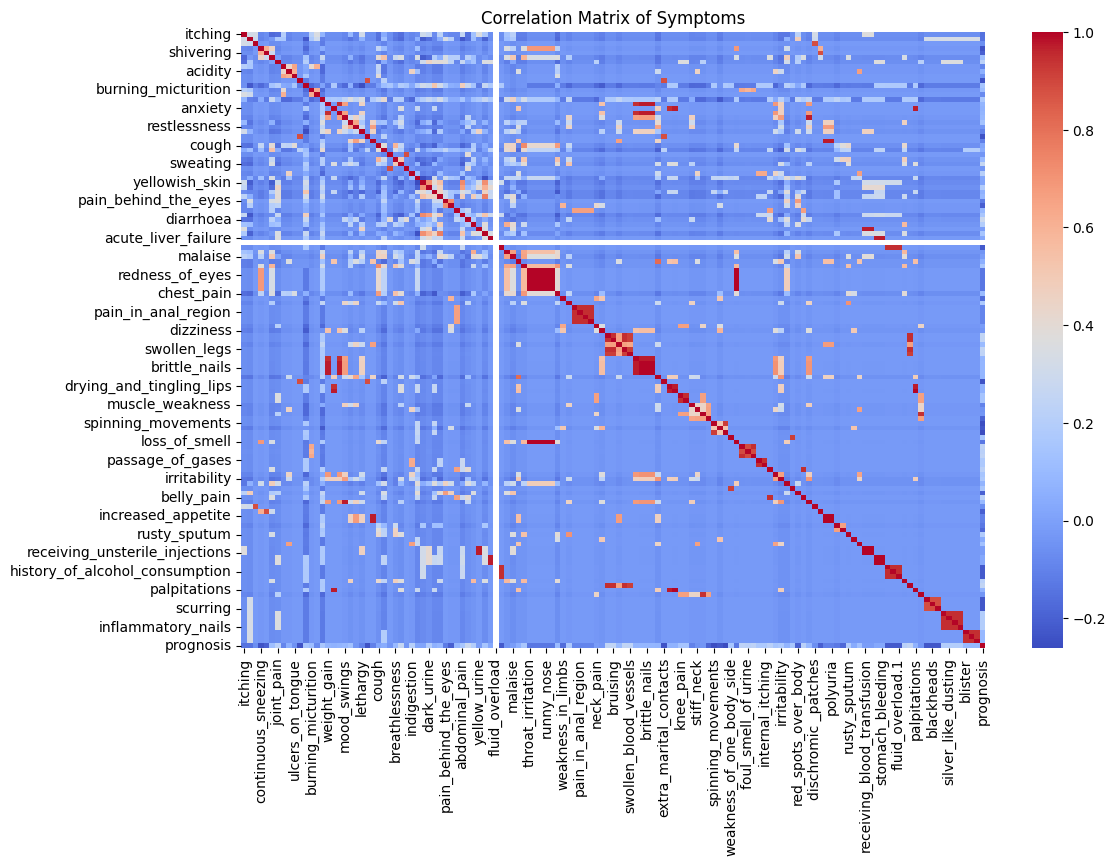

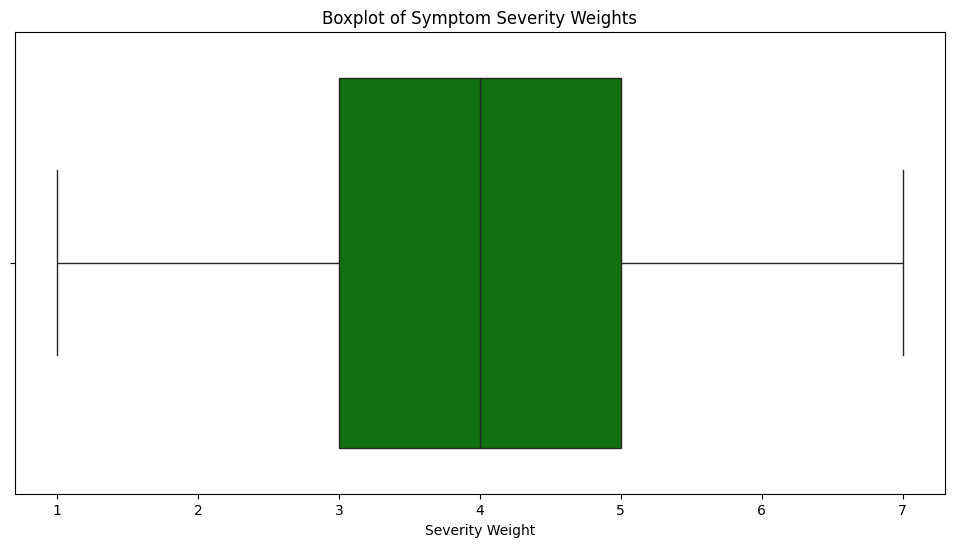

In [16]:
# Visualization: Heatmap of Missing Values
plt.figure(figsize=(10, 5))
sns.heatmap(datasets['training'].isnull(), cmap='coolwarm', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Visualization: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = datasets['training'].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Symptoms")
plt.show()

# Visualization: Boxplot of Symptom Severity
plt.figure(figsize=(12, 6))
sns.boxplot(x=datasets['symptom_severity']['weight'], color='green')
plt.title("Boxplot of Symptom Severity Weights")
plt.xlabel("Severity Weight")
plt.show()

C:\Users\mmjay\AppData\Local\Temp\ipykernel_22572\904076014.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


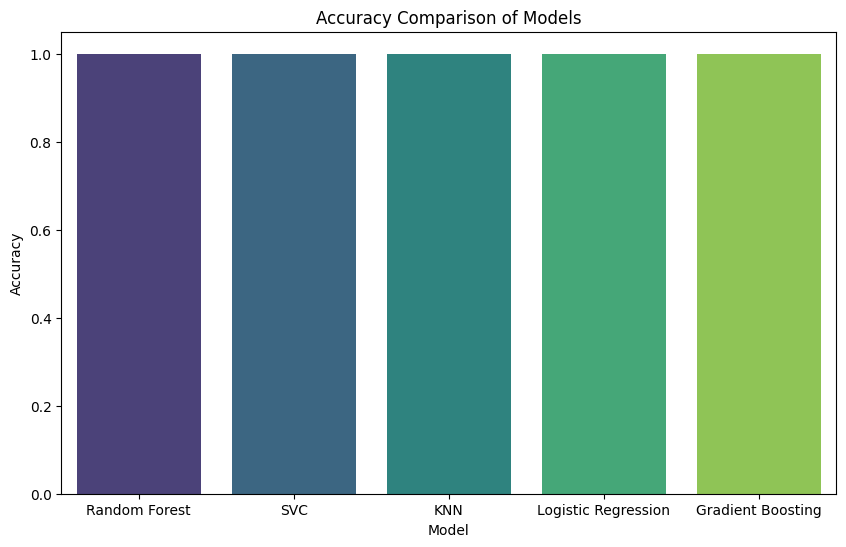

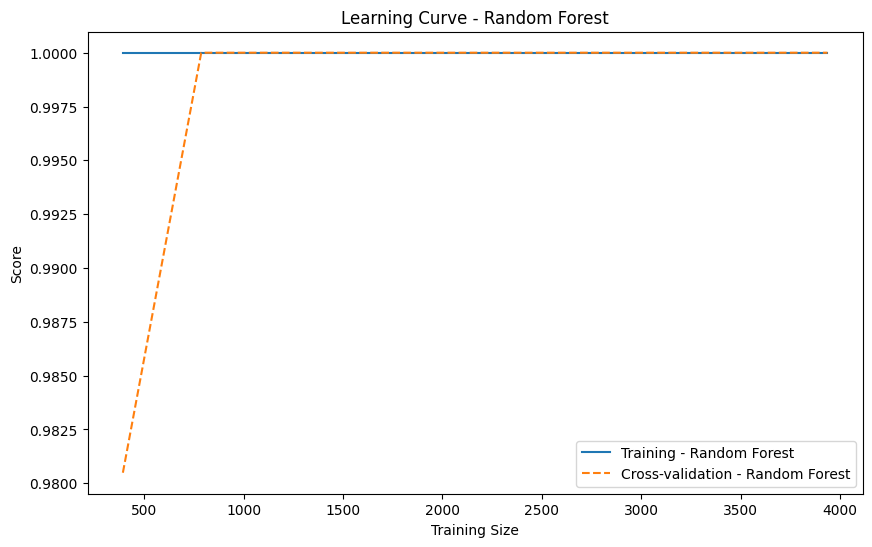

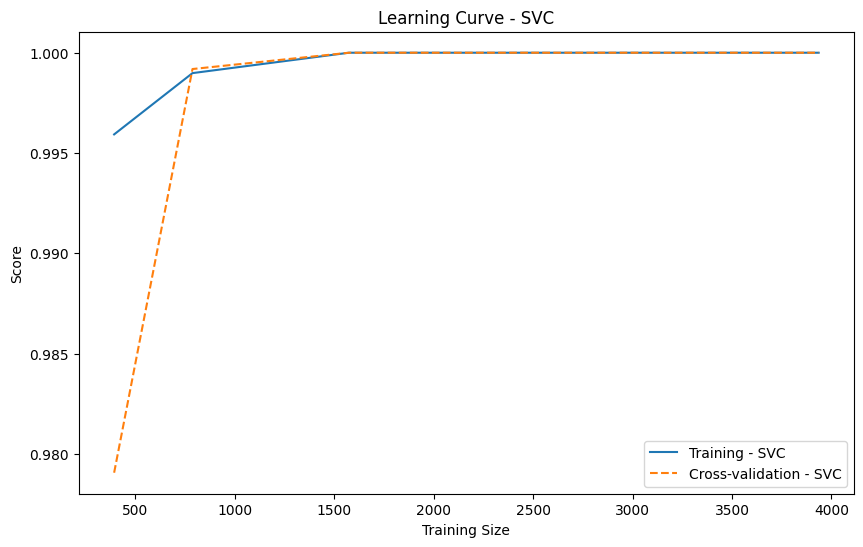

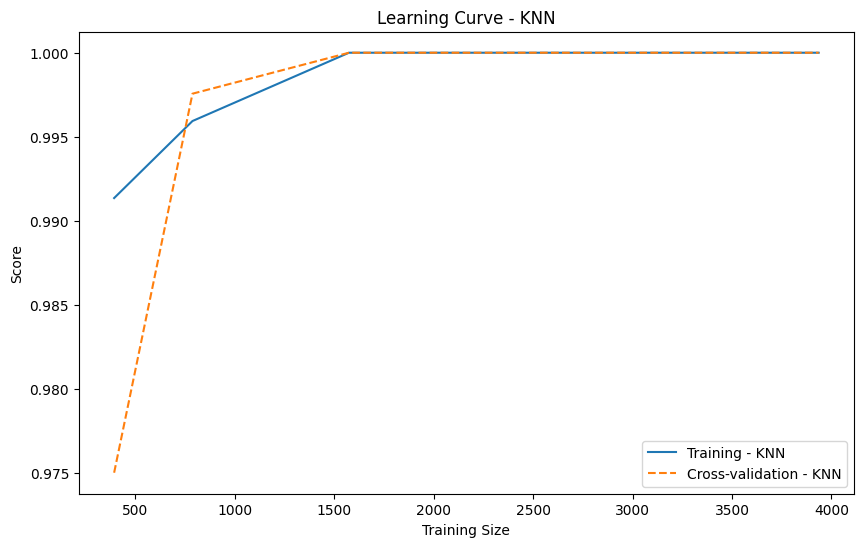

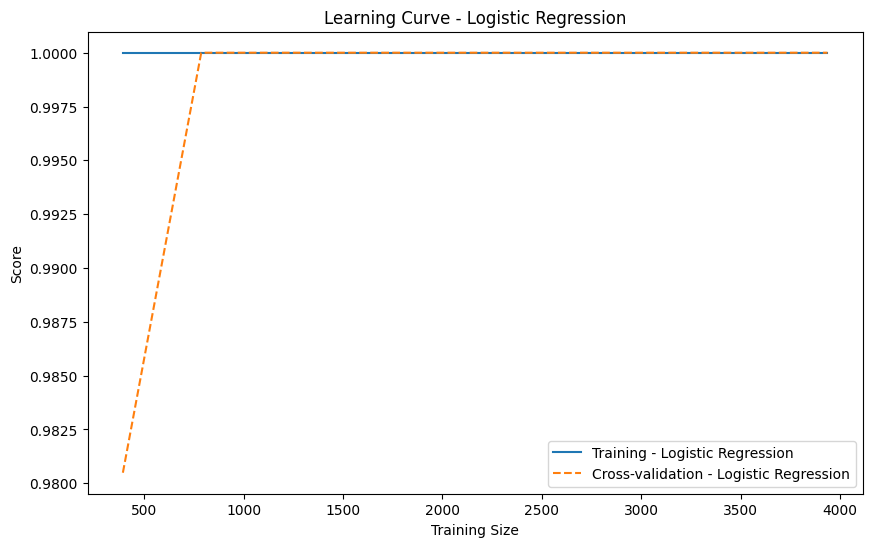

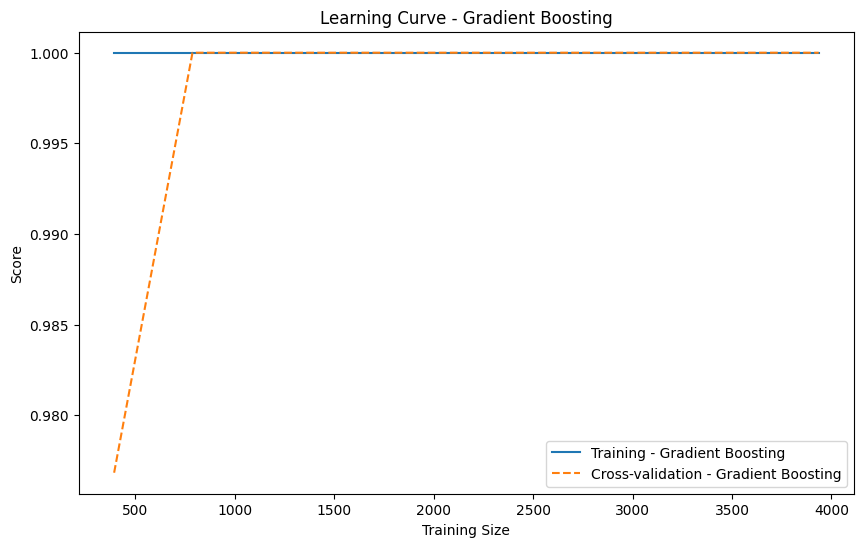

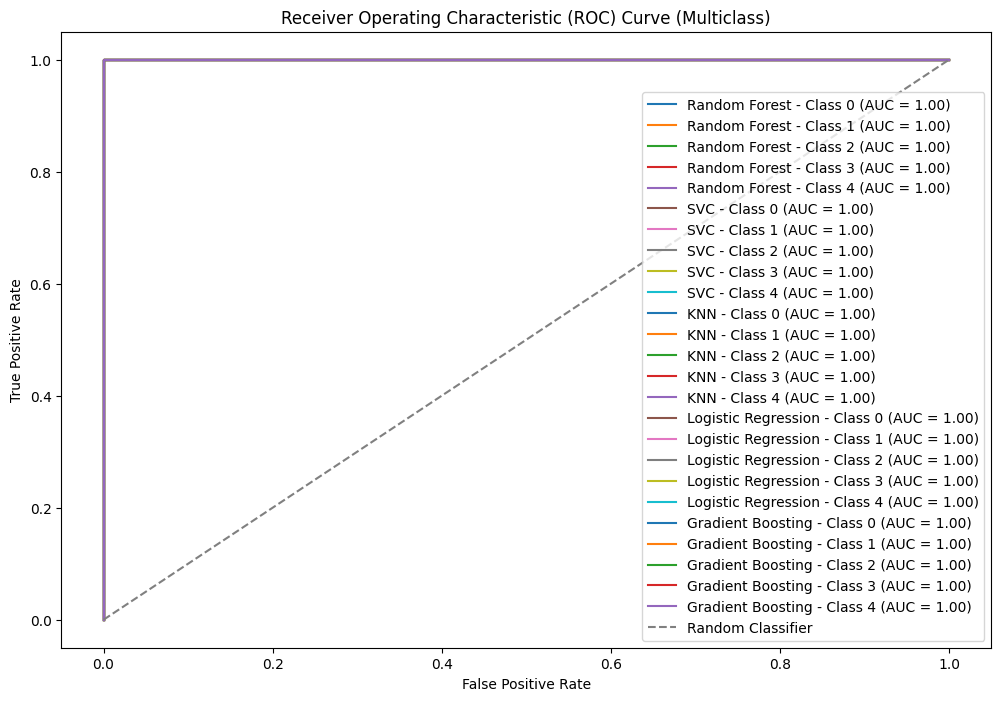

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Step 1: Load and preprocess datasets
files = {
    "precautions": "precautions_df.csv",
    "symptom_severity": "Symptom-severity.csv",
    "symptoms": "symtoms_df.csv",
    "training": "Training.csv",
    "workout": "workout_df.csv",
    "description": "description.csv",
    "diets": "diets.csv",
    "medications": "medications.csv"
}

datasets = {name: pd.read_csv(path) for name, path in files.items()}

# Drop unnecessary columns (Unnamed columns)
for name, df in datasets.items():
    df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True, errors='ignore')

# Check for missing values and fill them appropriately
for name, df in datasets.items():
    df.fillna("Not Available", inplace=True)

# Convert categorical disease names to numerical labels
le = LabelEncoder()
datasets['training']['prognosis'] = le.fit_transform(datasets['training']['prognosis'])

# Function to map symptom severity
def map_severity(symptom):
    row = datasets['symptom_severity'][datasets['symptom_severity']['Symptom'] == symptom]
    return row['weight'].values[0] if not row.empty else 0

# Convert symptoms into weighted values in training dataset
for col in datasets['training'].columns[:-1]:  # Exclude target column
    if col in datasets['symptom_severity']['Symptom'].values:
        datasets['training'][col] *= map_severity(col)

# Step 2: Splitting Data for ML
X = datasets['training'].drop(columns=['prognosis'])
y = datasets['training']['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Defining models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Step 4: Training models and evaluating performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'model': model
    }

# Step 5: Accuracy Comparison Plot
model_names = list(results.keys())
accuracy_scores = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title("Accuracy Comparison of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Step 6: Learning Curve Plot for Each Model
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_mean, label=f"Training - {model_name}")
    plt.plot(train_sizes, test_mean, label=f"Cross-validation - {model_name}", linestyle='--')

    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Step 7: ROC Curve Plot for All Models (Multiclass Support)
plt.figure(figsize=(12, 8))

# Binarize the output labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Adjust based on number of classes in your data
n_classes = y_test_bin.shape[1]

# Loop through each model and plot ROC curves
for model_name, model in models.items():
    # Fit the model in one-vs-rest scheme
    model = OneVsRestClassifier(model)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)
    
    # Compute ROC curve and ROC AUC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


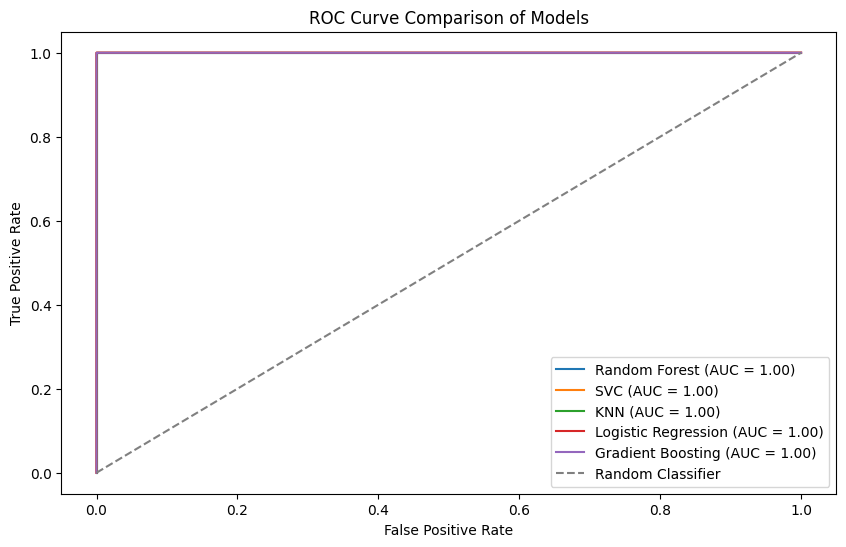

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=list(set(y_train)))  
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 6))

# Plot ROC curves for each model
for model_name, model in models.items():
    model = OneVsRestClassifier(model)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)
    
    # Compute the macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")

# Labels and title
plt.title('ROC Curve Comparison of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Using Random Forest Algorithm


In [4]:
import pandas as pd
import numpy as np
import joblib  # For saving model, scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Load Dataset
dataset_path = "Training.csv"  # Ensure this is the correct dataset file
df = pd.read_csv(dataset_path)

# 🔹 Identify Features (Symptoms) & Target (Disease)
X = df.drop(columns=['prognosis'])  # 'prognosis' is the target column
y = df['prognosis']  # Keeping it as categorical without encoding

# 🔹 Scale Features (important for Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Save the Model and Scaler
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(scaler, "random_scaler.pkl")

print("✅ Random Forest Model and Scaler saved successfully!")

# 🔹 Make Predictions
y_pred = rf_model.predict(X_test)

# 🔹 Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# 🔹 Detailed Performance Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Random Forest Model and Scaler saved successfully!
🎯 Random Forest Model Accuracy: 100.00%

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00 

In [5]:
# 🔹 Load the saved model
loaded_model = joblib.load("random_forest_model.pkl")

# 🔹 Example: Making predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

print(f"✅ Loaded model accuracy: {accuracy_score(y_test, y_pred_loaded) * 100:.2f}%")


✅ Loaded model accuracy: 100.00%


In [6]:
# 🔹 User Input Prediction
import warnings
warnings.filterwarnings("ignore")
def predict_disease(symptoms):
    input_data = np.zeros(len(X.columns))  # Initialize with zeros
    
    for symptom in symptoms:
        if symptom in X.columns:
            input_data[X.columns.get_loc(symptom)] = 1  # Mark symptom presence
    
    input_data = scaler.transform([input_data])  # Scale input data
    prediction = rf_model.predict(input_data)[0]  # Predict disease
    print(f"🩺 Predicted Disease: {prediction}")

# 🔹 Get User Input
user_input = input("Enter symptoms (comma-separated, e.g., itching, skin_rash, nausea): ")
symptoms_list = [sym.strip() for sym in user_input.split(',')]
predict_disease(symptoms_list)


Enter symptoms (comma-separated, e.g., itching, skin_rash, nausea):  irritability, depression, acidity


🩺 Predicted Disease: Migraine


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd
import joblib

# 🔹 Load the trained model and scaler
rf_model = joblib.load("random_forest_model.pkl")  # Load trained Random Forest model
scaler = joblib.load("random_scaler.pkl")  # Load the scaler used for training

# 🔹 Load Datasets
description_df = pd.read_csv("description.csv")[['Disease', 'Description']]
precautions_df = pd.read_csv("precautions_df.csv")[['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
medications_df = pd.read_csv("medications.csv")[['Disease', 'Medication']]
diets_df = pd.read_csv("diets.csv")[['Disease', 'Diet']]
workouts_df = pd.read_csv("workout_df.csv")[['disease', 'workout']]

# 🔹 Load Symptoms Dataset for Features
training_data = pd.read_csv("Training.csv")  # Ensure this matches the training dataset
all_symptoms = training_data.columns[:-1]  # Exclude the 'prognosis' column

# 🔹 Function to Predict Disease
def predict_disease(symptoms):
    input_data = np.zeros(len(all_symptoms))  # Initialize input array with zeros

    for symptom in symptoms:
        if symptom in all_symptoms:
            input_data[list(all_symptoms).index(symptom)] = 1  # Set 1 for present symptoms

    input_data = scaler.transform([input_data])  # Scale input
    predicted_disease = rf_model.predict(input_data)[0]  # Get the predicted disease

    return predicted_disease

# 🔹 Function to Retrieve Disease Information
def get_disease_info(disease):
    description = description_df.loc[description_df['Disease'] == disease, 'Description'].values
    precautions = precautions_df.loc[precautions_df['Disease'] == disease, ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
    medications = medications_df.loc[medications_df['Disease'] == disease, 'Medication'].values
    diet = diets_df.loc[diets_df['Disease'] == disease, 'Diet'].values
    workout = workouts_df.loc[workouts_df['disease'] == disease, 'workout'].values

    # Format Results
    return {
        "Description": description[0] if len(description) > 0 else "No description available",
        "Precautions": precautions[0].tolist() if len(precautions) > 0 else ["No precautions available"],
        "Medications": medications.tolist() if len(medications) > 0 else ["No medications available"],
        "Diet": diet[0] if len(diet) > 0 else "No diet available",
        "Workout": workout[0] if len(workout) > 0 else "No workout available",
    }

# 🔹 Get User Input
user_input = input("Enter symptoms (comma-separated, e.g., itching, skin_rash, nausea): ")
symptoms_list = [sym.strip() for sym in user_input.split(',')]

# 🔹 Predict Disease & Retrieve Details
predicted_disease = predict_disease(symptoms_list)
disease_info = get_disease_info(predicted_disease)

# 🔹 Display Results
print(f"\n🩺 Predicted Disease: {predicted_disease}\n")
print(f"📖 Description: {disease_info['Description']}\n")
print(f"⚕️ Medications: {', '.join(disease_info['Medications'])}\n")
print(f"🛑 Precautions: {', '.join(disease_info['Precautions'])}\n")
print(f"🥗 Recommended Diet: {disease_info['Diet']}\n")
print(f"🏋️ Workout Suggestions: {disease_info['Workout']}\n")


Enter symptoms (comma-separated, e.g., itching, skin_rash, nausea):  irritability, depression, acidity



🩺 Predicted Disease: Migraine

📖 Description: Migraine is a type of headache that often involves severe pain and sensitivity to light and sound.

⚕️ Medications: ['Analgesics', 'Triptans', 'Ergotamine derivatives', 'Preventive medications', 'Biofeedback']

🛑 Precautions: meditation, reduce stress, use poloroid glasses in sun, consult doctor

🥗 Recommended Diet: ['Migraine Diet', 'Low-Tyramine Diet', 'Caffeine withdrawal', 'Hydration', 'Magnesium-rich foods']

🏋️ Workout Suggestions: Identify and avoid trigger foods

